In [1]:
#Import packages

In [2]:
import sparseflow
import scipy.io as io
import numpy as np
import logging
import pandas as pd
import matplotlib.pyplot as plt
import pylab
from scipy import sparse 

In [3]:
#Loading ECFP matrix

In [4]:
ecfp = pd.read_csv('/home/daniele/Desktop/plip/sparseflow/ecfp.txt', header = 0)

In [5]:
del ecfp['Unnamed: 0']

In [6]:
#Loading IC50 matrix

In [7]:
ic50 = pd.read_csv('/home/daniele/Desktop/plip/sparseflow/ic50.txt', header = 0)

In [8]:
del ic50['Unnamed: 0']

In [9]:
#Making a parse matrix

In [10]:
ic50coo = sparse.coo_matrix(ic50)
ic50coo

<2595x1256 sparse matrix of type '<type 'numpy.float64'>'
	with 10935 stored elements in COOrdinate format>

In [11]:
ecfpcoo= sparse.coo_matrix(ecfp)
ecfpcoo

<2595x43151 sparse matrix of type '<type 'numpy.int64'>'
	with 182736 stored elements in COOrdinate format>

In [12]:
#Test set

In [13]:
test = np.random.rand(ic50coo.shape[0]) < 0.2

In [14]:
#Setting logging to show progress

In [15]:
logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(levelname)s - %(message)s')

In [16]:
#Running Macau with default setting

In [18]:
smlp = sparseflow.SparseMLP(
         Y            = ic50coo,
         Ytest        = test,
         X            = ecfpcoo,
         h_sizes      = [200],
         optimizer    = "adam",
         lr           = [1e-3, 3e-4],
         lr_durations = [10, 10],
         batch_size   = 150,
         l2_reg       = 10,
         dropout      = 0.8,
         auc_min_pos  = 50,
         auc_min_neg  = 50,
)
smlp.run()

aucs01 = []
aucs01 += smlp.aucs_test
aucs01

2019-07-29 13:00:34,511 - INFO - Computing mean AUC for 2 columns (with 50 positives and 50 negatives).
2019-07-29 13:00:34,812 - INFO - TensorFlow model setup completed!
2019-07-29 13:00:36,892 - INFO - 	logl_tr  logl_te |  auc_tr   auc_te
2019-07-29 13:00:36,893 - INFO - 0.	0.48739  0.57629 | 0.96326  0.83795 | 1.0e-03 [1.7 sec]
2019-07-29 13:00:38,478 - INFO - 1.	0.30659  0.49704 | 0.98083  0.83817 | 1.0e-03 [1.6 sec]
2019-07-29 13:00:40,081 - INFO - 2.	0.21559  0.48587 | 0.99205  0.83692 | 1.0e-03 [1.6 sec]
2019-07-29 13:00:41,656 - INFO - 3.	0.15604  0.48886 | 0.99771  0.84821 | 1.0e-03 [1.6 sec]
2019-07-29 13:00:43,233 - INFO - 4.	0.11498  0.50509 | 0.99893  0.85189 | 1.0e-03 [1.6 sec]
2019-07-29 13:00:44,855 - INFO - 5.	0.08702  0.52421 | 0.99921  0.85058 | 1.0e-03 [1.6 sec]
2019-07-29 13:00:46,445 - INFO - 6.	0.06707  0.54126 | 0.99930  0.85308 | 1.0e-03 [1.6 sec]
2019-07-29 13:00:48,045 - INFO - 7.	0.05295  0.56118 | 0.99930  0.85442 | 1.0e-03 [1.6 sec]
2019-07-29 13:00:49,633

[0.837948717948718,
 0.838173076923077,
 0.8369230769230769,
 0.8482051282051282,
 0.8518910256410257,
 0.8505769230769231,
 0.8530769230769231,
 0.854423076923077,
 0.8531410256410257,
 0.8582692307692308,
 0.862051282051282,
 0.8595192307692308,
 0.8607692307692307,
 0.8607692307692307,
 0.8607692307692307,
 0.8595192307692308,
 0.862051282051282,
 0.862051282051282,
 0.8620833333333333,
 0.862051282051282]

2019-07-29 13:01:38,837 - DEBUG - findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans (u'/home/daniele/anaconda2/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


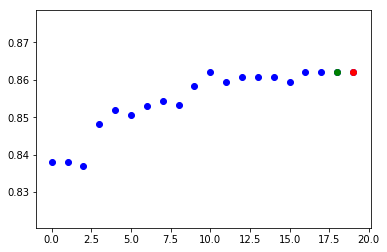

In [19]:
aucs01_indeces = []
list_aucs01_indeces = []
def indices( aucs01, value):
    return [i for i,x in enumerate(aucs01) if x==value]

for a in aucs01:
    aucs01_indeces += indices(aucs01, a)
    set_aucs01_indeces = set(aucs01_indeces)
for s in set_aucs01_indeces:
    list_aucs01_indeces += [s]

fig, ax = plt.subplots()
ax.scatter(list_aucs01_indeces, aucs01, color="blue")
ax.scatter(list_aucs01_indeces[-1], aucs01[-1], color="red")
ax.scatter(list_aucs01_indeces[aucs01.index(max(aucs01))], max(aucs01), color="green")
plt.show()

In [20]:
#Tuning Macau

In [21]:
##h_sizes=[200]
##ld_durations=[20,20]
smlp = sparseflow.SparseMLP(
         Y            = ic50coo,
         Ytest        = test,
         X            = ecfpcoo,
         h_sizes      = [200],
         optimizer    = "adam",
         lr           = [1e-3, 3e-4],
         lr_durations = [20, 20],
         batch_size   = 150,
         l2_reg       = 10,
         dropout      = 0.8,
         auc_min_pos  = 50,
         auc_min_neg  = 50,
)
smlp.run()

aucs02 = []
aucs02 += smlp.aucs_test

2019-07-29 13:11:00,991 - INFO - Computing mean AUC for 2 columns (with 50 positives and 50 negatives).
2019-07-29 13:11:01,253 - INFO - TensorFlow model setup completed!
2019-07-29 13:11:03,310 - INFO - 	logl_tr  logl_te |  auc_tr   auc_te
2019-07-29 13:11:03,311 - INFO - 0.	0.47588  0.57222 | 0.95117  0.83179 | 1.0e-03 [1.6 sec]
2019-07-29 13:11:04,845 - INFO - 1.	0.30343  0.49512 | 0.98128  0.84304 | 1.0e-03 [1.5 sec]
2019-07-29 13:11:06,390 - INFO - 2.	0.21404  0.48813 | 0.99258  0.83051 | 1.0e-03 [1.5 sec]
2019-07-29 13:11:07,959 - INFO - 3.	0.15618  0.49324 | 0.99623  0.84689 | 1.0e-03 [1.6 sec]
2019-07-29 13:11:09,490 - INFO - 4.	0.11533  0.50276 | 0.99874  0.85564 | 1.0e-03 [1.5 sec]
2019-07-29 13:11:11,062 - INFO - 5.	0.08735  0.52257 | 0.99884  0.85183 | 1.0e-03 [1.6 sec]
2019-07-29 13:11:12,866 - INFO - 6.	0.06762  0.54209 | 0.99930  0.84679 | 1.0e-03 [1.8 sec]
2019-07-29 13:11:14,541 - INFO - 7.	0.05371  0.55716 | 0.99940  0.85311 | 1.0e-03 [1.7 sec]
2019-07-29 13:11:16,177

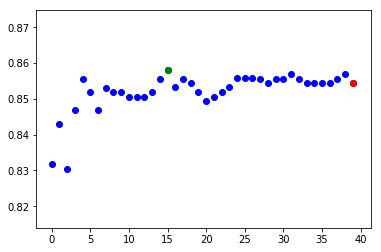

In [22]:
aucs02_indeces = []
list_aucs02_indeces = []
def indices( aucs02, value):
    return [i for i,x in enumerate(aucs02) if x==value]

for a in aucs02:
    aucs02_indeces += indices(aucs02, a)
    set_aucs02_indeces = set(aucs02_indeces)
for s in set_aucs02_indeces:
    list_aucs02_indeces += [s]

fig, ax = plt.subplots()
ax.scatter(list_aucs02_indeces, aucs02, color="blue")
ax.scatter(list_aucs02_indeces[-1], aucs02[-1], color="red")
ax.scatter(list_aucs02_indeces[aucs02.index(max(aucs02))], max(aucs02), color="green")
plt.show()

2019-07-29 13:13:18,598 - INFO - Computing mean AUC for 2 columns (with 50 positives and 50 negatives).
2019-07-29 13:13:18,834 - INFO - TensorFlow model setup completed!
2019-07-29 13:13:20,836 - INFO - 	logl_tr  logl_te |  auc_tr   auc_te
2019-07-29 13:13:20,837 - INFO - 0.	0.52822  0.59327 | 0.96342  0.83817 | 1.0e-03 [1.6 sec]
2019-07-29 13:13:22,425 - INFO - 1.	0.41033  0.51345 | 0.96958  0.82426 | 1.0e-03 [1.6 sec]
2019-07-29 13:13:24,704 - INFO - 2.	0.36928  0.49749 | 0.97162  0.83817 | 1.0e-03 [2.3 sec]
2019-07-29 13:13:26,426 - INFO - 3.	0.35247  0.49176 | 0.97354  0.84702 | 1.0e-03 [1.7 sec]
2019-07-29 13:13:28,006 - INFO - 4.	0.34367  0.49289 | 0.97695  0.83696 | 1.0e-03 [1.6 sec]
2019-07-29 13:13:29,589 - INFO - 5.	0.33895  0.48773 | 0.97944  0.85712 | 1.0e-03 [1.6 sec]
2019-07-29 13:13:31,221 - INFO - 6.	0.33429  0.48963 | 0.97974  0.84827 | 1.0e-03 [1.6 sec]
2019-07-29 13:13:32,791 - INFO - 7.	0.32845  0.48671 | 0.98399  0.85583 | 1.0e-03 [1.6 sec]
2019-07-29 13:13:34,383

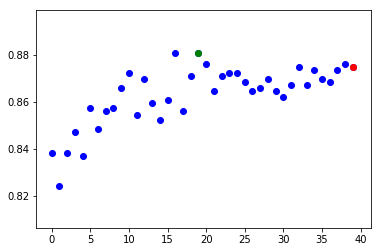

In [23]:
##h_sizes=[200]
##ld_durations=[20,20]
##l2_reg       = 20
smlp = sparseflow.SparseMLP(
         Y            = ic50coo,
         Ytest        = test,
         X            = ecfpcoo,
         h_sizes      = [200],
         optimizer    = "adam",
         lr           = [1e-3, 3e-4],
         lr_durations = [20, 20],
         batch_size   = 150,
         l2_reg       = 20,
         dropout      = 0.8,
         auc_min_pos  = 50,
         auc_min_neg  = 50,
)
smlp.run()

aucs03 = []
aucs03 += smlp.aucs_test

aucs03_indeces = []
list_aucs03_indeces = []
def indices( aucs03, value):
    return [i for i,x in enumerate(aucs03) if x==value]

for a in aucs03:
    aucs03_indeces += indices(aucs03, a)
    set_aucs03_indeces = set(aucs03_indeces)
for s in set_aucs03_indeces:
    list_aucs03_indeces += [s]

fig, ax = plt.subplots()
ax.scatter(list_aucs03_indeces, aucs03, color="blue")
ax.scatter(list_aucs03_indeces[-1], aucs03[-1], color="red")
ax.scatter(list_aucs03_indeces[aucs03.index(max(aucs03))], max(aucs03), color="green")
plt.show()

2019-07-29 13:17:32,381 - INFO - Computing mean AUC for 2 columns (with 50 positives and 50 negatives).
2019-07-29 13:17:32,617 - INFO - TensorFlow model setup completed!
2019-07-29 13:17:34,687 - INFO - 	logl_tr  logl_te |  auc_tr   auc_te
2019-07-29 13:17:34,688 - INFO - 0.	0.53483  0.59887 | 0.96279  0.81048 | 1.0e-03 [1.6 sec]
2019-07-29 13:17:36,247 - INFO - 1.	0.41502  0.52081 | 0.96513  0.83420 | 1.0e-03 [1.6 sec]
2019-07-29 13:17:37,797 - INFO - 2.	0.37096  0.49765 | 0.97319  0.84067 | 1.0e-03 [1.5 sec]
2019-07-29 13:17:39,412 - INFO - 3.	0.35402  0.49051 | 0.97596  0.84692 | 1.0e-03 [1.6 sec]
2019-07-29 13:17:40,949 - INFO - 4.	0.34480  0.49292 | 0.97323  0.85580 | 1.0e-03 [1.5 sec]
2019-07-29 13:17:42,518 - INFO - 5.	0.34007  0.49255 | 0.97731  0.84199 | 1.0e-03 [1.6 sec]
2019-07-29 13:17:44,047 - INFO - 6.	0.33560  0.48873 | 0.97977  0.86090 | 1.0e-03 [1.5 sec]
2019-07-29 13:17:45,576 - INFO - 7.	0.33094  0.48863 | 0.97897  0.85965 | 1.0e-03 [1.5 sec]
2019-07-29 13:17:47,098

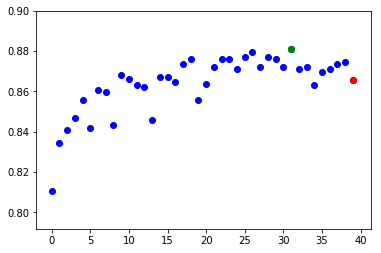

In [24]:
## running factorization (Macau)
##h_sizes=[200]
##ld_durations=[20,20]
##l2_reg= 30
smlp = sparseflow.SparseMLP(
         Y            = ic50coo,
         Ytest        = test,
         X            = ecfpcoo,
         h_sizes      = [200],
         optimizer    = "adam",
         lr           = [1e-3, 3e-4],
         lr_durations = [20, 20],
         batch_size   = 150,
         l2_reg       = 30,
         dropout      = 0.8,
         auc_min_pos  = 50,
         auc_min_neg  = 50,
)
smlp.run()

aucs04 = []
aucs04 += smlp.aucs_test

aucs04_indeces = []
list_aucs04_indeces = []
def indices( aucs04, value):
    return [i for i,x in enumerate(aucs04) if x==value]

for a in aucs04:
    aucs04_indeces += indices(aucs04, a)
    set_aucs04_indeces = set(aucs04_indeces)
for s in set_aucs04_indeces:
    list_aucs04_indeces += [s]

fig, ax = plt.subplots()
ax.scatter(list_aucs04_indeces, aucs04, color="blue")
ax.scatter(list_aucs04_indeces[-1], aucs04[-1], color="red")
ax.scatter(list_aucs04_indeces[aucs04.index(max(aucs04))], max(aucs04), color="green")
plt.show()

2019-07-29 13:20:10,086 - INFO - Computing mean AUC for 2 columns (with 50 positives and 50 negatives).
2019-07-29 13:20:10,308 - INFO - TensorFlow model setup completed!
2019-07-29 13:20:12,315 - INFO - 	logl_tr  logl_te |  auc_tr   auc_te
2019-07-29 13:20:12,316 - INFO - 0.	0.53118  0.59782 | 0.95673  0.82192 | 1.0e-03 [1.6 sec]
2019-07-29 13:20:13,851 - INFO - 1.	0.41262  0.51632 | 0.96835  0.83804 | 1.0e-03 [1.5 sec]
2019-07-29 13:20:15,376 - INFO - 2.	0.37031  0.49757 | 0.97463  0.83061 | 1.0e-03 [1.5 sec]
2019-07-29 13:20:16,900 - INFO - 3.	0.35467  0.49275 | 0.97248  0.84449 | 1.0e-03 [1.5 sec]
2019-07-29 13:20:18,424 - INFO - 4.	0.34560  0.49379 | 0.97354  0.84311 | 1.0e-03 [1.5 sec]
2019-07-29 13:20:19,993 - INFO - 5.	0.33972  0.48954 | 0.98094  0.84958 | 1.0e-03 [1.6 sec]
2019-07-29 13:20:21,527 - INFO - 6.	0.33507  0.49095 | 0.97751  0.85712 | 1.0e-03 [1.5 sec]
2019-07-29 13:20:23,052 - INFO - 7.	0.33063  0.49367 | 0.97907  0.84962 | 1.0e-03 [1.5 sec]
2019-07-29 13:20:24,593

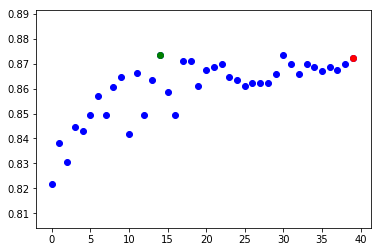

In [25]:
##h_sizes=[200]
##ld_durations=[20,20]
##l2_reg= 25
smlp = sparseflow.SparseMLP(
         Y            = ic50coo,
         Ytest        = test,
         X            = ecfpcoo,
         h_sizes      = [200],
         optimizer    = "adam",
         lr           = [1e-3, 3e-4],
         lr_durations = [20, 20],
         batch_size   = 150,
         l2_reg       = 25,
         dropout      = 0.8,
         auc_min_pos  = 50,
         auc_min_neg  = 50,
)
smlp.run()

aucs05 = []
aucs05 += smlp.aucs_test

aucs05_indeces = []
list_aucs05_indeces = []
def indices( aucs05, value):
    return [i for i,x in enumerate(aucs05) if x==value]

for a in aucs05:
    aucs05_indeces += indices(aucs05, a)
    set_aucs05_indeces = set(aucs05_indeces)
for s in set_aucs05_indeces:
    list_aucs05_indeces += [s]

fig, ax = plt.subplots()
ax.scatter(list_aucs05_indeces, aucs05, color="blue")
ax.scatter(list_aucs05_indeces[-1], aucs05[-1], color="red")
ax.scatter(list_aucs05_indeces[aucs05.index(max(aucs05))], max(aucs05), color="green")
plt.show()

2019-07-29 13:23:57,032 - INFO - Computing mean AUC for 2 columns (with 50 positives and 50 negatives).
2019-07-29 13:23:57,314 - INFO - TensorFlow model setup completed!
2019-07-29 13:23:59,372 - INFO - 	logl_tr  logl_te |  auc_tr   auc_te
2019-07-29 13:23:59,372 - INFO - 0.	0.52884  0.59343 | 0.95852  0.82814 | 1.0e-03 [1.6 sec]
2019-07-29 13:24:00,898 - INFO - 1.	0.40981  0.51306 | 0.96560  0.82824 | 1.0e-03 [1.5 sec]
2019-07-29 13:24:02,421 - INFO - 2.	0.36945  0.49710 | 0.97194  0.83564 | 1.0e-03 [1.5 sec]
2019-07-29 13:24:03,948 - INFO - 3.	0.35340  0.49165 | 0.97655  0.84705 | 1.0e-03 [1.5 sec]
2019-07-29 13:24:05,466 - INFO - 4.	0.34498  0.48988 | 0.97643  0.85077 | 1.0e-03 [1.5 sec]
2019-07-29 13:24:06,996 - INFO - 5.	0.33889  0.49207 | 0.97770  0.83692 | 1.0e-03 [1.5 sec]
2019-07-29 13:24:08,533 - INFO - 6.	0.33477  0.48853 | 0.97437  0.85971 | 1.0e-03 [1.5 sec]
2019-07-29 13:24:10,045 - INFO - 7.	0.33040  0.49064 | 0.98441  0.84708 | 1.0e-03 [1.5 sec]
2019-07-29 13:24:11,577

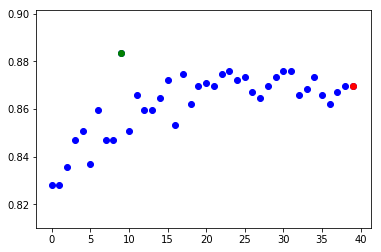

In [26]:
##h_sizes=[200]
##ld_durations=[20,20]
##l2_reg= 22
smlp = sparseflow.SparseMLP(
         Y            = ic50coo,
         Ytest        = test,
         X            = ecfpcoo,
         h_sizes      = [200],
         optimizer    = "adam",
         lr           = [1e-3, 3e-4],
         lr_durations = [20, 20],
         batch_size   = 150,
         l2_reg       = 22,
         dropout      = 0.8,
         auc_min_pos  = 50,
         auc_min_neg  = 50,
)
smlp.run()

aucs06 = []
aucs06 += smlp.aucs_test

aucs06_indeces = []
list_aucs06_indeces = []
def indices( aucs06, value):
    return [i for i,x in enumerate(aucs06) if x==value]

for a in aucs06:
    aucs06_indeces += indices(aucs06, a)
    set_aucs06_indeces = set(aucs06_indeces)
for s in set_aucs06_indeces:
    list_aucs06_indeces += [s]

fig, ax = plt.subplots()
ax.scatter(list_aucs06_indeces, aucs06, color="blue")
ax.scatter(list_aucs06_indeces[-1], aucs06[-1], color="red")
ax.scatter(list_aucs06_indeces[aucs06.index(max(aucs06))], max(aucs06), color="green")
plt.show()

2019-07-29 13:26:39,142 - INFO - Computing mean AUC for 2 columns (with 50 positives and 50 negatives).
2019-07-29 13:26:39,364 - INFO - TensorFlow model setup completed!
2019-07-29 13:26:41,407 - INFO - 	logl_tr  logl_te |  auc_tr   auc_te
2019-07-29 13:26:41,408 - INFO - 0.	0.52668  0.59282 | 0.95671  0.80929 | 1.0e-03 [1.6 sec]
2019-07-29 13:26:42,958 - INFO - 1.	0.40838  0.51552 | 0.96943  0.82317 | 1.0e-03 [1.5 sec]
2019-07-29 13:26:44,483 - INFO - 2.	0.36748  0.49617 | 0.97793  0.84199 | 1.0e-03 [1.5 sec]
2019-07-29 13:26:46,009 - INFO - 3.	0.35227  0.49351 | 0.97155  0.84571 | 1.0e-03 [1.5 sec]
2019-07-29 13:26:47,528 - INFO - 4.	0.34404  0.49083 | 0.97527  0.83321 | 1.0e-03 [1.5 sec]
2019-07-29 13:26:49,048 - INFO - 5.	0.33850  0.49254 | 0.97699  0.83824 | 1.0e-03 [1.5 sec]
2019-07-29 13:26:50,571 - INFO - 6.	0.33390  0.48928 | 0.97971  0.85077 | 1.0e-03 [1.5 sec]
2019-07-29 13:26:52,102 - INFO - 7.	0.32964  0.48778 | 0.98532  0.84317 | 1.0e-03 [1.5 sec]
2019-07-29 13:26:53,677

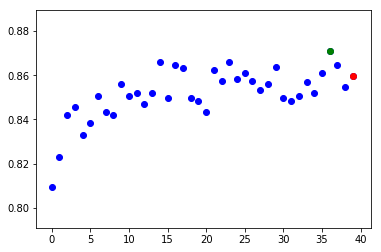

In [27]:
##h_sizes=[200]
##ld_durations=[20,20]
##l2_reg= 21
smlp = sparseflow.SparseMLP(
         Y            = ic50coo,
         Ytest        = test,
         X            = ecfpcoo,
         h_sizes      = [200],
         optimizer    = "adam",
         lr           = [1e-3, 3e-4],
         lr_durations = [20, 20],
         batch_size   = 150,
         l2_reg       = 21,
         dropout      = 0.8,
         auc_min_pos  = 50,
         auc_min_neg  = 50,
)
smlp.run()

aucs07 = []
aucs07 += smlp.aucs_test

aucs07_indeces = []
list_aucs07_indeces = []
def indices( aucs07, value):
    return [i for i,x in enumerate(aucs07) if x==value]

for a in aucs07:
    aucs07_indeces += indices(aucs07, a)
    set_aucs07_indeces = set(aucs07_indeces)
for s in set_aucs07_indeces:
    list_aucs07_indeces += [s]

fig, ax = plt.subplots()
ax.scatter(list_aucs07_indeces, aucs07, color="blue")
ax.scatter(list_aucs07_indeces[-1], aucs07[-1], color="red")
ax.scatter(list_aucs07_indeces[aucs07.index(max(aucs07))], max(aucs07), color="green")
plt.show()

2019-07-29 13:30:32,738 - INFO - Computing mean AUC for 2 columns (with 50 positives and 50 negatives).
2019-07-29 13:30:33,047 - INFO - TensorFlow model setup completed!
2019-07-29 13:30:35,045 - INFO - 	logl_tr  logl_te |  auc_tr   auc_te
2019-07-29 13:30:35,046 - INFO - 0.	0.53667  0.59981 | 0.96076  0.84699 | 1.0e-03 [1.6 sec]
2019-07-29 13:30:36,574 - INFO - 1.	0.41053  0.51818 | 0.96826  0.83317 | 1.0e-03 [1.5 sec]
2019-07-29 13:30:38,112 - INFO - 2.	0.36831  0.49576 | 0.96730  0.83702 | 1.0e-03 [1.5 sec]
2019-07-29 13:30:39,701 - INFO - 3.	0.35373  0.49303 | 0.97497  0.84949 | 1.0e-03 [1.6 sec]
2019-07-29 13:30:41,335 - INFO - 4.	0.34401  0.49042 | 0.97451  0.85455 | 1.0e-03 [1.6 sec]
2019-07-29 13:30:42,885 - INFO - 5.	0.33905  0.48601 | 0.97633  0.84583 | 1.0e-03 [1.5 sec]
2019-07-29 13:30:44,468 - INFO - 6.	0.33458  0.49213 | 0.97662  0.84446 | 1.0e-03 [1.6 sec]
2019-07-29 13:30:46,032 - INFO - 7.	0.33023  0.48839 | 0.97915  0.85083 | 1.0e-03 [1.6 sec]
2019-07-29 13:30:47,565

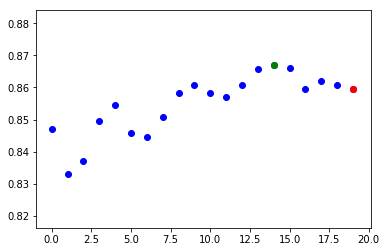

In [28]:
##ld_durations=[10,10]
##l2_reg= 20
smlp = sparseflow.SparseMLP(
         Y            = ic50coo,
         Ytest        = test,
         X            = ecfpcoo,
         h_sizes      = [200],
         optimizer    = "adam",
         lr           = [1e-3, 3e-4],
         lr_durations = [10, 10],
         batch_size   = 150,
         l2_reg       = 20,
         dropout      = 0.8,
         auc_min_pos  = 50,
         auc_min_neg  = 50,
)
smlp.run()

aucs08 = []
aucs08 += smlp.aucs_test

aucs08_indeces = []
list_aucs08_indeces = []
def indices( aucs08, value):
    return [i for i,x in enumerate(aucs08) if x==value]

for a in aucs08:
    aucs08_indeces += indices(aucs08, a)
    set_aucs08_indeces = set(aucs08_indeces)
for s in set_aucs08_indeces:
    list_aucs08_indeces += [s]

fig, ax = plt.subplots()
ax.scatter(list_aucs08_indeces, aucs08, color="blue")
ax.scatter(list_aucs08_indeces[-1], aucs08[-1], color="red")
ax.scatter(list_aucs08_indeces[aucs08.index(max(aucs08))], max(aucs08), color="green")
plt.show()

2019-07-29 13:34:01,788 - INFO - Computing mean AUC for 2 columns (with 50 positives and 50 negatives).
2019-07-29 13:34:02,011 - INFO - TensorFlow model setup completed!
2019-07-29 13:34:04,802 - INFO - 	logl_tr  logl_te |  auc_tr   auc_te
2019-07-29 13:34:04,803 - INFO - 0.	0.49061  0.57462 | 0.95876  0.84192 | 1.0e-03 [2.2 sec]
2019-07-29 13:34:06,766 - INFO - 1.	0.37874  0.50279 | 0.97244  0.83449 | 1.0e-03 [2.0 sec]
2019-07-29 13:34:08,729 - INFO - 2.	0.34809  0.49592 | 0.97220  0.84699 | 1.0e-03 [2.0 sec]
2019-07-29 13:34:10,681 - INFO - 3.	0.33610  0.48807 | 0.98100  0.84696 | 1.0e-03 [1.9 sec]
2019-07-29 13:34:12,636 - INFO - 4.	0.32984  0.48681 | 0.98265  0.84830 | 1.0e-03 [2.0 sec]
2019-07-29 13:34:14,599 - INFO - 5.	0.32482  0.48531 | 0.98283  0.85199 | 1.0e-03 [2.0 sec]
2019-07-29 13:34:16,553 - INFO - 6.	0.32069  0.48943 | 0.98674  0.84574 | 1.0e-03 [2.0 sec]
2019-07-29 13:34:18,529 - INFO - 7.	0.31588  0.48890 | 0.98683  0.86728 | 1.0e-03 [2.0 sec]
2019-07-29 13:34:20,531

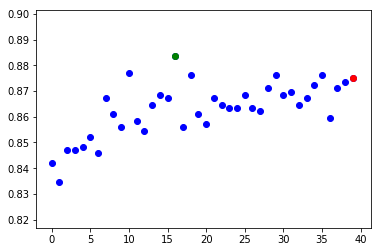

In [29]:
##ld_durations=[20,20]
##l2_reg= 20
smlp = sparseflow.SparseMLP(
         Y            = ic50coo,
         Ytest        = test,
         X            = ecfpcoo,
         h_sizes      = [300],
         optimizer    = "adam",
         lr           = [1e-3, 3e-4],
         lr_durations = [20, 20],
         batch_size   = 150,
         l2_reg       = 20,
         dropout      = 0.8,
         auc_min_pos  = 50,
         auc_min_neg  = 50,
)
smlp.run()

aucs09 = []
aucs09 += smlp.aucs_test
aucs09

aucs09_indeces = []
list_aucs09_indeces = []
def indices( aucs09, value):
    return [i for i,x in enumerate(aucs09) if x==value]

for a in aucs09:
    aucs09_indeces += indices(aucs09, a)
    set_aucs09_indeces = set(aucs09_indeces)
for s in set_aucs09_indeces:
    list_aucs09_indeces += [s]

fig, ax = plt.subplots()
ax.scatter(list_aucs09_indeces, aucs09, color="blue")
ax.scatter(list_aucs09_indeces[-1], aucs09[-1], color="red")
ax.scatter(list_aucs09_indeces[aucs09.index(max(aucs09))], max(aucs09), color="green")
plt.show()

2019-07-29 13:53:37,936 - INFO - Computing mean AUC for 2 columns (with 50 positives and 50 negatives).
2019-07-29 13:53:38,187 - INFO - TensorFlow model setup completed!
2019-07-29 13:53:42,539 - INFO - 	logl_tr  logl_te |  auc_tr   auc_te
2019-07-29 13:53:42,540 - INFO - 0.	0.50852  0.58356 | 0.95928  0.84455 | 1.0e-03 [2.5 sec]
2019-07-29 13:53:44,462 - INFO - 1.	0.39107  0.50813 | 0.97023  0.83833 | 1.0e-03 [1.9 sec]
2019-07-29 13:53:46,321 - INFO - 2.	0.35598  0.49411 | 0.97850  0.84330 | 1.0e-03 [1.9 sec]
2019-07-29 13:53:48,332 - INFO - 3.	0.34280  0.49463 | 0.97312  0.85455 | 1.0e-03 [2.0 sec]
2019-07-29 13:53:50,261 - INFO - 4.	0.33546  0.48828 | 0.98258  0.85708 | 1.0e-03 [1.9 sec]
2019-07-29 13:53:52,148 - INFO - 5.	0.32962  0.48842 | 0.98370  0.86087 | 1.0e-03 [1.9 sec]
2019-07-29 13:53:53,991 - INFO - 6.	0.32561  0.49243 | 0.98197  0.84574 | 1.0e-03 [1.8 sec]
2019-07-29 13:53:56,109 - INFO - 7.	0.32210  0.48747 | 0.97786  0.85468 | 1.0e-03 [2.1 sec]
2019-07-29 13:53:58,041

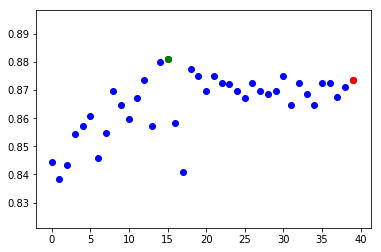

In [30]:
##h_sizes=[250]
##ld_durations=[20,20]
##l2_reg= 20
smlp = sparseflow.SparseMLP(
         Y            = ic50coo,
         Ytest        = test,
         X            = ecfpcoo,
         h_sizes      = [250],
         optimizer    = "adam",
         lr           = [1e-3, 3e-4],
         lr_durations = [20, 20],
         batch_size   = 150,
         l2_reg       = 20,
         dropout      = 0.8,
         auc_min_pos  = 50,
         auc_min_neg  = 50,
)
smlp.run()

aucs10 = []
aucs10 += smlp.aucs_test
aucs10

aucs10_indeces = []
list_aucs10_indeces = []
def indices( aucs10, value):
    return [i for i,x in enumerate(aucs10) if x==value]

for a in aucs10:
    aucs10_indeces += indices(aucs10, a)
    set_aucs10_indeces = set(aucs10_indeces)
for s in set_aucs10_indeces:
    list_aucs10_indeces += [s]

fig, ax = plt.subplots()
ax.scatter(list_aucs10_indeces, aucs10, color="blue")
ax.scatter(list_aucs10_indeces[-1], aucs10[-1], color="red")
ax.scatter(list_aucs10_indeces[aucs10.index(max(aucs10))], max(aucs10), color="green")
plt.show()

2019-07-29 13:57:53,128 - INFO - Computing mean AUC for 2 columns (with 50 positives and 50 negatives).
2019-07-29 13:57:53,358 - INFO - TensorFlow model setup completed!
2019-07-29 13:57:55,504 - INFO - 	logl_tr  logl_te |  auc_tr   auc_te
2019-07-29 13:57:55,505 - INFO - 0.	0.51671  0.58987 | 0.96063  0.82561 | 1.0e-03 [1.7 sec]
2019-07-29 13:57:57,160 - INFO - 1.	0.39858  0.51165 | 0.97360  0.83689 | 1.0e-03 [1.6 sec]
2019-07-29 13:57:58,790 - INFO - 2.	0.36154  0.49462 | 0.97136  0.82808 | 1.0e-03 [1.6 sec]
2019-07-29 13:58:00,560 - INFO - 3.	0.34752  0.49205 | 0.97700  0.83574 | 1.0e-03 [1.8 sec]
2019-07-29 13:58:02,204 - INFO - 4.	0.33954  0.49235 | 0.98260  0.83067 | 1.0e-03 [1.6 sec]
2019-07-29 13:58:03,836 - INFO - 5.	0.33274  0.49368 | 0.98181  0.84814 | 1.0e-03 [1.6 sec]
2019-07-29 13:58:05,483 - INFO - 6.	0.32905  0.48711 | 0.97980  0.84949 | 1.0e-03 [1.6 sec]
2019-07-29 13:58:07,145 - INFO - 7.	0.32473  0.48788 | 0.97918  0.84333 | 1.0e-03 [1.7 sec]
2019-07-29 13:58:08,784

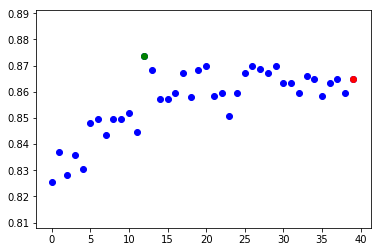

In [31]:
##h_sizes=[225]
##ld_durations=[20,20]
##l2_reg= 20
smlp = sparseflow.SparseMLP(
         Y            = ic50coo,
         Ytest        = test,
         X            = ecfpcoo,
         h_sizes      = [225],
         optimizer    = "adam",
         lr           = [1e-3, 3e-4],
         lr_durations = [20, 20],
         batch_size   = 150,
         l2_reg       = 20,
         dropout      = 0.8,
         auc_min_pos  = 50,
         auc_min_neg  = 50,
)
smlp.run()

aucs11 = []
aucs11 += smlp.aucs_test

aucs11_indeces = []
list_aucs11_indeces = []
def indices( aucs11, value):
    return [i for i,x in enumerate(aucs11) if x==value]

for a in aucs11:
    aucs11_indeces += indices(aucs11, a)
    set_aucs11_indeces = set(aucs11_indeces)
for s in set_aucs11_indeces:
    list_aucs11_indeces += [s]

fig, ax = plt.subplots()
ax.scatter(list_aucs11_indeces, aucs11, color="blue")
ax.scatter(list_aucs11_indeces[-1], aucs11[-1], color="red")
ax.scatter(list_aucs11_indeces[aucs11.index(max(aucs11))], max(aucs11), color="green")
plt.show()

2019-07-29 14:13:00,130 - INFO - Computing mean AUC for 2 columns (with 50 positives and 50 negatives).
2019-07-29 14:13:00,374 - INFO - TensorFlow model setup completed!
2019-07-29 14:13:02,429 - INFO - 	logl_tr  logl_te |  auc_tr   auc_te
2019-07-29 14:13:02,430 - INFO - 0.	0.52593  0.59102 | 0.94562  0.82821 | 1.0e-03 [1.6 sec]
2019-07-29 14:13:03,981 - INFO - 1.	0.40871  0.51590 | 0.96376  0.82702 | 1.0e-03 [1.5 sec]
2019-07-29 14:13:05,519 - INFO - 2.	0.36889  0.49871 | 0.97094  0.83696 | 1.0e-03 [1.5 sec]
2019-07-29 14:13:07,097 - INFO - 3.	0.35360  0.48990 | 0.96782  0.83689 | 1.0e-03 [1.6 sec]
2019-07-29 14:13:08,641 - INFO - 4.	0.34412  0.49221 | 0.97328  0.82202 | 1.0e-03 [1.5 sec]
2019-07-29 14:13:10,175 - INFO - 5.	0.33912  0.49036 | 0.98042  0.85840 | 1.0e-03 [1.5 sec]
2019-07-29 14:13:11,704 - INFO - 6.	0.33501  0.49043 | 0.97321  0.84955 | 1.0e-03 [1.5 sec]
2019-07-29 14:13:13,222 - INFO - 7.	0.33128  0.49123 | 0.98109  0.84455 | 1.0e-03 [1.5 sec]
2019-07-29 14:13:14,801

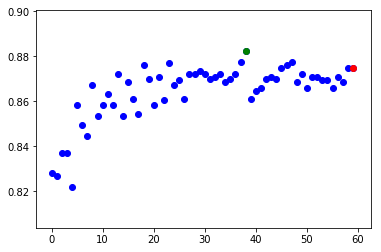

In [32]:
##h_sizes=[200]
##ld_durations=[30,30]
##l2_reg= 20
smlp = sparseflow.SparseMLP(
         Y            = ic50coo,
         Ytest        = test,
         X            = ecfpcoo,
         h_sizes      = [200],
         optimizer    = "adam",
         lr           = [1e-3, 3e-4],
         lr_durations = [30, 30],
         batch_size   = 150,
         l2_reg       = 20,
         dropout      = 0.8,
         auc_min_pos  = 50,
         auc_min_neg  = 50,
)
smlp.run()

aucs12 = []
aucs12 += smlp.aucs_test

aucs12_indeces = []
list_aucs12_indeces = []
def indices( aucs12, value):
    return [i for i,x in enumerate(aucs12) if x==value]

for a in aucs12:
    aucs12_indeces += indices(aucs12, a)
    set_aucs12_indeces = set(aucs12_indeces)
for s in set_aucs12_indeces:
    list_aucs12_indeces += [s]

fig, ax = plt.subplots()
ax.scatter(list_aucs12_indeces, aucs12, color="blue")
ax.scatter(list_aucs12_indeces[-1], aucs12[-1], color="red")
ax.scatter(list_aucs12_indeces[aucs12.index(max(aucs12))], max(aucs12), color="green")
plt.show()



2019-07-29 14:16:54,626 - INFO - Computing mean AUC for 2 columns (with 50 positives and 50 negatives).
2019-07-29 14:16:54,853 - INFO - TensorFlow model setup completed!
2019-07-29 14:16:57,751 - INFO - 	logl_tr  logl_te |  auc_tr   auc_te
2019-07-29 14:16:57,752 - INFO - 0.	0.51939  0.58840 | 0.95511  0.83824 | 1.0e-03 [2.3 sec]
2019-07-29 14:16:59,419 - INFO - 1.	0.40188  0.51197 | 0.96658  0.81920 | 1.0e-03 [1.7 sec]
2019-07-29 14:17:01,135 - INFO - 2.	0.36487  0.49137 | 0.97315  0.83304 | 1.0e-03 [1.7 sec]
2019-07-29 14:17:02,774 - INFO - 3.	0.34863  0.49326 | 0.97492  0.84824 | 1.0e-03 [1.6 sec]
2019-07-29 14:17:04,415 - INFO - 4.	0.34019  0.49235 | 0.97510  0.85080 | 1.0e-03 [1.6 sec]
2019-07-29 14:17:06,055 - INFO - 5.	0.33534  0.49014 | 0.97394  0.85471 | 1.0e-03 [1.6 sec]
2019-07-29 14:17:07,862 - INFO - 6.	0.33113  0.48917 | 0.98259  0.84333 | 1.0e-03 [1.8 sec]
2019-07-29 14:17:09,568 - INFO - 7.	0.32634  0.48900 | 0.97343  0.84962 | 1.0e-03 [1.7 sec]
2019-07-29 14:17:11,202

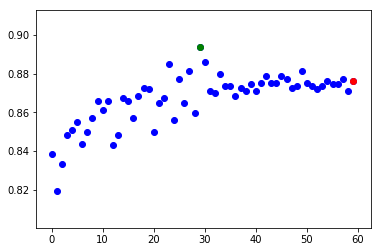

In [33]:
##h_sizes=[225]
##ld_durations=[30,30]
##l2_reg= 20
smlp = sparseflow.SparseMLP(
         Y            = ic50coo,
         Ytest        = test,
         X            = ecfpcoo,
         h_sizes      = [225],
         optimizer    = "adam",
         lr           = [1e-3, 3e-4],
         lr_durations = [30, 30],
         batch_size   = 150,
         l2_reg       = 20,
         dropout      = 0.8,
         auc_min_pos  = 50,
         auc_min_neg  = 50,
)
smlp.run()
aucs13 = []
aucs13 += smlp.aucs_test
aucs13

aucs13_indeces = []
list_aucs13_indeces = []
def indices( aucs13, value):
    return [i for i,x in enumerate(aucs13) if x==value]

for a in aucs13:
    aucs13_indeces += indices(aucs13, a)
    set_aucs13_indeces = set(aucs13_indeces)
for s in set_aucs13_indeces:
    list_aucs13_indeces += [s]

fig, ax = plt.subplots()
ax.scatter(list_aucs13_indeces, aucs13, color="blue")
ax.scatter(list_aucs13_indeces[-1], aucs13[-1], color="red")
ax.scatter(list_aucs13_indeces[aucs13.index(max(aucs13))], max(aucs13), color="green")
plt.show()

2019-07-29 14:21:01,256 - INFO - Computing mean AUC for 2 columns (with 50 positives and 50 negatives).
2019-07-29 14:21:01,504 - INFO - TensorFlow model setup completed!
2019-07-29 14:21:03,511 - INFO - 	logl_tr  logl_te |  auc_tr   auc_te
2019-07-29 14:21:03,512 - INFO - 0.	0.53259  0.59793 | 0.95076  0.81558 | 1.0e-03 [1.6 sec]
2019-07-29 14:21:05,045 - INFO - 1.	0.41241  0.51852 | 0.97288  0.83189 | 1.0e-03 [1.5 sec]
2019-07-29 14:21:06,575 - INFO - 2.	0.36965  0.49885 | 0.97335  0.83067 | 1.0e-03 [1.5 sec]
2019-07-29 14:21:08,237 - INFO - 3.	0.35435  0.49285 | 0.97159  0.84196 | 1.0e-03 [1.7 sec]
2019-07-29 14:21:09,778 - INFO - 4.	0.34405  0.49226 | 0.97867  0.83949 | 1.0e-03 [1.5 sec]
2019-07-29 14:21:11,335 - INFO - 5.	0.33823  0.48830 | 0.97481  0.84712 | 1.0e-03 [1.6 sec]
2019-07-29 14:21:12,884 - INFO - 6.	0.33444  0.48920 | 0.97716  0.83821 | 1.0e-03 [1.5 sec]
2019-07-29 14:21:14,399 - INFO - 7.	0.33014  0.48729 | 0.98178  0.86343 | 1.0e-03 [1.5 sec]
2019-07-29 14:21:15,928

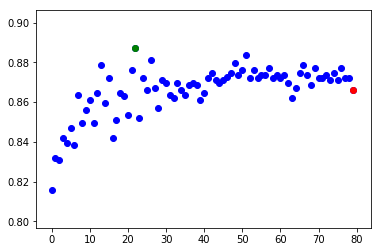

In [34]:
##h_sizes=[200]
##ld_durations=[40,40]
##l2_reg= 20
smlp = sparseflow.SparseMLP(
         Y            = ic50coo,
         Ytest        = test,
         X            = ecfpcoo,
         h_sizes      = [200],
         optimizer    = "adam",
         lr           = [1e-3, 3e-4],
         lr_durations = [40, 40],
         batch_size   = 150,
         l2_reg       = 20,
         dropout      = 0.8,
         auc_min_pos  = 50,
         auc_min_neg  = 50,
)
smlp.run()

aucs14 = []
aucs14 += smlp.aucs_test
aucs14

aucs14_indeces = []
list_aucs14_indeces = []
def indices( aucs14, value):
    return [i for i,x in enumerate(aucs14) if x==value]

for a in aucs14:
    aucs14_indeces += indices(aucs14, a)
    set_aucs14_indeces = set(aucs14_indeces)
for s in set_aucs14_indeces:
    list_aucs14_indeces += [s]

fig, ax = plt.subplots()
ax.scatter(list_aucs14_indeces, aucs14, color="blue")
ax.scatter(list_aucs14_indeces[-1], aucs14[-1], color="red")
ax.scatter(list_aucs14_indeces[aucs14.index(max(aucs14))], max(aucs14), color="green")
plt.show()

2019-07-29 14:29:08,288 - INFO - Computing mean AUC for 2 columns (with 50 positives and 50 negatives).
2019-07-29 14:29:08,531 - INFO - TensorFlow model setup completed!
2019-07-29 14:29:11,079 - INFO - 	logl_tr  logl_te |  auc_tr   auc_te
2019-07-29 14:29:11,080 - INFO - 0.	0.67456  0.68415 | 0.92678  0.80003 | 1.0e-04 [2.0 sec]
2019-07-29 14:29:12,823 - INFO - 1.	0.65499  0.67412 | 0.95207  0.83929 | 1.0e-04 [1.7 sec]
2019-07-29 14:29:14,578 - INFO - 2.	0.63613  0.66410 | 0.96041  0.84196 | 1.0e-04 [1.8 sec]
2019-07-29 14:29:16,418 - INFO - 3.	0.61756  0.65361 | 0.96400  0.84074 | 1.0e-04 [1.8 sec]
2019-07-29 14:29:18,301 - INFO - 4.	0.59878  0.64238 | 0.96741  0.84077 | 1.0e-04 [1.9 sec]
2019-07-29 14:29:20,146 - INFO - 5.	0.57929  0.62997 | 0.96665  0.83702 | 1.0e-04 [1.8 sec]
2019-07-29 14:29:21,942 - INFO - 6.	0.55978  0.61679 | 0.96946  0.83827 | 1.0e-04 [1.8 sec]
2019-07-29 14:29:23,789 - INFO - 7.	0.54011  0.60307 | 0.96940  0.83071 | 1.0e-04 [1.8 sec]
2019-07-29 14:29:25,540

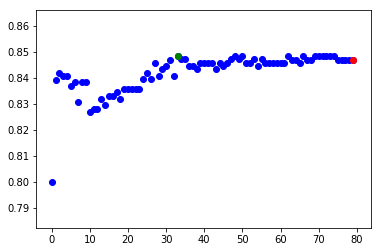

In [35]:
##h_sizes=[200]
##ld_durations=[40,40]
##l2_reg= 20
##lr = [1e-4, 3e-5]
smlp = sparseflow.SparseMLP(
         Y            = ic50coo,
         Ytest        = test,
         X            = ecfpcoo,
         h_sizes      = [200],
         optimizer    = "adam",
         lr           = [1e-4, 3e-5],
         lr_durations = [40, 40],
         batch_size   = 150,
         l2_reg       = 20,
         dropout      = 0.8,
         auc_min_pos  = 50,
         auc_min_neg  = 50,
)
smlp.run()

aucs15 = []
aucs15 += smlp.aucs_test

aucs15_indeces = []
list_aucs15_indeces = []
def indices( aucs15, value):
    return [i for i,x in enumerate(aucs15) if x==value]

for a in aucs15:
    aucs15_indeces += indices(aucs15, a)
    set_aucs15_indeces = set(aucs15_indeces)
for s in set_aucs15_indeces:
    list_aucs15_indeces += [s]

fig, ax = plt.subplots()
ax.scatter(list_aucs15_indeces, aucs15, color="blue")
ax.scatter(list_aucs15_indeces[-1], aucs15[-1], color="red")
ax.scatter(list_aucs15_indeces[aucs15.index(max(aucs15))], max(aucs15), color="green")
plt.show()

2019-07-29 14:33:16,470 - INFO - Computing mean AUC for 2 columns (with 50 positives and 50 negatives).
2019-07-29 14:33:16,692 - INFO - TensorFlow model setup completed!
2019-07-29 14:33:18,786 - INFO - 	logl_tr  logl_te |  auc_tr   auc_te
2019-07-29 14:33:18,787 - INFO - 0.	0.41018  0.51608 | 0.91359  0.80910 | 1.0e-02 [1.6 sec]
2019-07-29 14:33:20,374 - INFO - 1.	0.38556  0.49830 | 0.86569  0.83506 | 1.0e-02 [1.6 sec]
2019-07-29 14:33:21,952 - INFO - 2.	0.35689  0.48796 | 0.91678  0.80458 | 1.0e-02 [1.6 sec]
2019-07-29 14:33:23,547 - INFO - 3.	0.34469  0.49147 | 0.92338  0.82199 | 1.0e-02 [1.6 sec]
2019-07-29 14:33:25,129 - INFO - 4.	0.32408  0.47975 | 0.91439  0.87231 | 1.0e-02 [1.6 sec]
2019-07-29 14:33:26,698 - INFO - 5.	0.32617  0.48019 | 0.94201  0.85699 | 1.0e-02 [1.6 sec]
2019-07-29 14:33:28,265 - INFO - 6.	0.31682  0.47985 | 0.90930  0.79958 | 1.0e-02 [1.6 sec]
2019-07-29 14:33:29,839 - INFO - 7.	0.31657  0.48129 | 0.92617  0.88006 | 1.0e-02 [1.6 sec]
2019-07-29 14:33:31,412

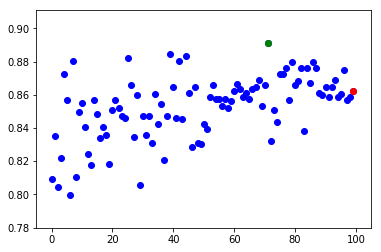

In [36]:
##h_sizes=[200]
##ld_durations=[40,40]
##l2_reg= 20
##lr = [1e-2, 3e-3]
smlp = sparseflow.SparseMLP(
         Y            = ic50coo,
         Ytest        = test,
         X            = ecfpcoo,
         h_sizes      = [200],
         optimizer    = "adam",
         lr           = [1e-2, 3e-3],
         lr_durations = [50, 50],
         batch_size   = 150,
         l2_reg       = 20,
         dropout      = 0.8,
         auc_min_pos  = 50,
         auc_min_neg  = 50,
)
smlp.run()

aucs16 = []
aucs16 += smlp.aucs_test

aucs16_indeces = []
list_aucs16_indeces = []
def indices( aucs16, value):
    return [i for i,x in enumerate(aucs16) if x==value]

for a in aucs16:
    aucs16_indeces += indices(aucs16, a)
    set_aucs16_indeces = set(aucs16_indeces)
for s in set_aucs16_indeces:
    list_aucs16_indeces += [s]

fig, ax = plt.subplots()
ax.scatter(list_aucs16_indeces, aucs16, color="blue")
ax.scatter(list_aucs16_indeces[-1], aucs16[-1], color="red")
ax.scatter(list_aucs16_indeces[aucs16.index(max(aucs16))], max(aucs16), color="green")
plt.show()

2019-07-29 14:37:32,762 - INFO - Computing mean AUC for 2 columns (with 50 positives and 50 negatives).
2019-07-29 14:37:32,991 - INFO - TensorFlow model setup completed!
2019-07-29 14:37:35,045 - INFO - 	logl_tr  logl_te |  auc_tr   auc_te
2019-07-29 14:37:35,046 - INFO - 0.	0.44570  0.53833 | 0.82322  0.73295 | 1.0e-01 [1.6 sec]
2019-07-29 14:37:36,606 - INFO - 1.	0.42517  0.51874 | 0.73947  0.56327 | 1.0e-01 [1.6 sec]
2019-07-29 14:37:38,138 - INFO - 2.	0.41096  0.51544 | 0.87811  0.85724 | 1.0e-01 [1.5 sec]
2019-07-29 14:37:39,777 - INFO - 3.	0.40459  0.51353 | 0.78208  0.73676 | 1.0e-01 [1.6 sec]
2019-07-29 14:37:41,309 - INFO - 4.	0.39264  0.51438 | 0.77433  0.79452 | 1.0e-01 [1.5 sec]
2019-07-29 14:37:42,835 - INFO - 5.	0.39264  0.51927 | 0.82051  0.78814 | 1.0e-01 [1.5 sec]
2019-07-29 14:37:44,356 - INFO - 6.	0.39222  0.52577 | 0.79623  0.84708 | 1.0e-01 [1.5 sec]
2019-07-29 14:37:45,939 - INFO - 7.	0.38714  0.52498 | 0.81348  0.80192 | 1.0e-01 [1.6 sec]
2019-07-29 14:37:47,534

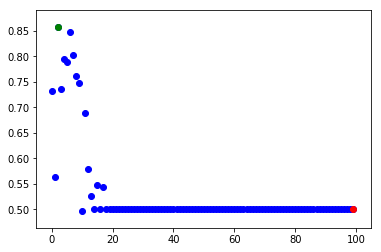

In [37]:
##h_sizes=[200]
##ld_durations=[50,50]
##l2_reg= 20
##lr = [1e-1, 3e-2]
smlp = sparseflow.SparseMLP(
         Y            = ic50coo,
         Ytest        = test,
         X            = ecfpcoo,
         h_sizes      = [200],
         optimizer    = "adam",
         lr           = [1e-1, 3e-2],
         lr_durations = [50, 50],
         batch_size   = 150,
         l2_reg       = 20,
         dropout      = 0.8,
         auc_min_pos  = 50,
         auc_min_neg  = 50,
)
smlp.run()

aucs17 = []
aucs17 += smlp.aucs_test

aucs17_indeces = []
list_aucs17_indeces = []
def indices( aucs17, value):
    return [i for i,x in enumerate(aucs17) if x==value]

for a in aucs17:
    aucs17_indeces += indices(aucs17, a)
    set_aucs17_indeces = set(aucs17_indeces)
for s in set_aucs17_indeces:
    list_aucs17_indeces += [s]

fig, ax = plt.subplots()
ax.scatter(list_aucs17_indeces, aucs17, color="blue")
ax.scatter(list_aucs17_indeces[-1], aucs17[-1], color="red")
ax.scatter(list_aucs17_indeces[aucs17.index(max(aucs17))], max(aucs17), color="green")
plt.show()

2019-07-29 14:45:48,783 - INFO - Computing mean AUC for 2 columns (with 50 positives and 50 negatives).
2019-07-29 14:45:49,030 - INFO - TensorFlow model setup completed!
2019-07-29 14:45:50,942 - INFO - 	logl_tr  logl_te |  auc_tr   auc_te
2019-07-29 14:45:50,943 - INFO - 0.	0.41480  0.52557 | 0.89635  0.76946 | 1.0e-02 [1.4 sec]
2019-07-29 14:45:52,376 - INFO - 1.	0.39277  0.49948 | 0.94882  0.85215 | 1.0e-02 [1.4 sec]
2019-07-29 14:45:53,690 - INFO - 2.	0.35432  0.49442 | 0.90152  0.77830 | 1.0e-02 [1.3 sec]
2019-07-29 14:45:55,285 - INFO - 3.	0.34550  0.47815 | 0.92556  0.84087 | 1.0e-02 [1.6 sec]
2019-07-29 14:45:56,708 - INFO - 4.	0.32924  0.49713 | 0.90696  0.80163 | 1.0e-02 [1.4 sec]
2019-07-29 14:45:58,334 - INFO - 5.	0.33280  0.48356 | 0.91041  0.86356 | 1.0e-02 [1.6 sec]
2019-07-29 14:45:59,649 - INFO - 6.	0.32099  0.48503 | 0.93837  0.79292 | 1.0e-02 [1.3 sec]
2019-07-29 14:46:00,964 - INFO - 7.	0.31853  0.48334 | 0.92610  0.83314 | 1.0e-02 [1.3 sec]
2019-07-29 14:46:02,277

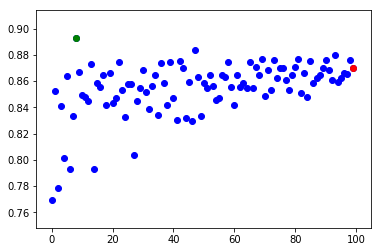

In [38]:
##h_sizes=[150]
##ld_durations=[50,50]
##l2_reg= 20
##lr = [1e-2, 3e-3]
smlp = sparseflow.SparseMLP(
         Y            = ic50coo,
         Ytest        = test,
         X            = ecfpcoo,
         h_sizes      = [150],
         optimizer    = "adam",
         lr           = [1e-2, 3e-3],
         lr_durations = [50, 50],
         batch_size   = 150,
         l2_reg       = 20,
         dropout      = 0.8,
         auc_min_pos  = 50,
         auc_min_neg  = 50,
)
smlp.run()

aucs18 = []
aucs18 += smlp.aucs_test

aucs18_indeces = []
list_aucs18_indeces = []
def indices( aucs18, value):
    return [i for i,x in enumerate(aucs18) if x==value]

for a in aucs18:
    aucs18_indeces += indices(aucs18, a)
    set_aucs18_indeces = set(aucs18_indeces)
for s in set_aucs18_indeces:
    list_aucs18_indeces += [s]

fig, ax = plt.subplots()
ax.scatter(list_aucs18_indeces, aucs18, color="blue")
ax.scatter(list_aucs18_indeces[-1], aucs18[-1], color="red")
ax.scatter(list_aucs18_indeces[aucs18.index(max(aucs18))], max(aucs18), color="green")
plt.show()

2019-07-29 14:49:36,818 - INFO - Computing mean AUC for 2 columns (with 50 positives and 50 negatives).
2019-07-29 14:49:37,039 - INFO - TensorFlow model setup completed!
2019-07-29 14:49:39,395 - INFO - 	logl_tr  logl_te |  auc_tr   auc_te
2019-07-29 14:49:39,396 - INFO - 0.	0.41379  0.52694 | 0.86571  0.73740 | 1.0e-02 [1.9 sec]
2019-07-29 14:49:41,161 - INFO - 1.	0.37757  0.50037 | 0.92797  0.81625 | 1.0e-02 [1.8 sec]
2019-07-29 14:49:42,911 - INFO - 2.	0.36438  0.49564 | 0.90360  0.78724 | 1.0e-02 [1.7 sec]
2019-07-29 14:49:44,706 - INFO - 3.	0.33936  0.49021 | 0.90981  0.79269 | 1.0e-02 [1.8 sec]
2019-07-29 14:49:46,443 - INFO - 4.	0.33333  0.48004 | 0.92778  0.87106 | 1.0e-02 [1.7 sec]
2019-07-29 14:49:48,188 - INFO - 5.	0.32055  0.48130 | 0.90799  0.82295 | 1.0e-02 [1.7 sec]
2019-07-29 14:49:49,921 - INFO - 6.	0.32016  0.47961 | 0.90029  0.85090 | 1.0e-02 [1.7 sec]
2019-07-29 14:49:51,745 - INFO - 7.	0.32157  0.48663 | 0.88152  0.79942 | 1.0e-02 [1.8 sec]
2019-07-29 14:49:53,484

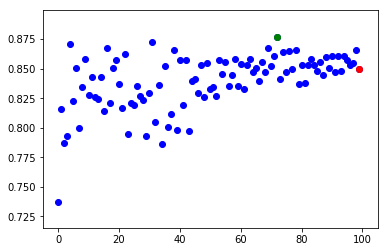

In [39]:
##h_sizes=[250]
##ld_durations=[50,50]
##l2_reg= 20
##lr = [1e-2, 3e-3]
smlp = sparseflow.SparseMLP(
         Y            = ic50coo,
         Ytest        = test,
         X            = ecfpcoo,
         h_sizes      = [250],
         optimizer    = "adam",
         lr           = [1e-2, 3e-3],
         lr_durations = [50, 50],
         batch_size   = 150,
         l2_reg       = 20,
         dropout      = 0.8,
         auc_min_pos  = 50,
         auc_min_neg  = 50,
)
smlp.run()

aucs19 = []
aucs19 += smlp.aucs_test

aucs19_indeces = []
list_aucs19_indeces = []
def indices( aucs19, value):
    return [i for i,x in enumerate(aucs19) if x==value]

for a in aucs19:
    aucs19_indeces += indices(aucs19, a)
    set_aucs19_indeces = set(aucs19_indeces)
for s in set_aucs19_indeces:
    list_aucs19_indeces += [s]

fig, ax = plt.subplots()
ax.scatter(list_aucs19_indeces, aucs19, color="blue")
ax.scatter(list_aucs19_indeces[-1], aucs19[-1], color="red")
ax.scatter(list_aucs19_indeces[aucs19.index(max(aucs19))], max(aucs19), color="green")
plt.show()

2019-07-29 14:53:38,569 - INFO - Computing mean AUC for 2 columns (with 50 positives and 50 negatives).
2019-07-29 14:53:38,801 - INFO - TensorFlow model setup completed!
2019-07-29 14:53:41,751 - INFO - 	logl_tr  logl_te |  auc_tr   auc_te
2019-07-29 14:53:41,752 - INFO - 0.	0.39593  0.52170 | 0.87586  0.80442 | 1.0e-02 [2.3 sec]
2019-07-29 14:53:44,032 - INFO - 1.	0.39035  0.49811 | 0.92809  0.82449 | 1.0e-02 [2.3 sec]
2019-07-29 14:53:46,027 - INFO - 2.	0.35814  0.48919 | 0.92069  0.86256 | 1.0e-02 [2.0 sec]
2019-07-29 14:53:48,073 - INFO - 3.	0.34228  0.48500 | 0.90878  0.84199 | 1.0e-02 [2.0 sec]
2019-07-29 14:53:50,077 - INFO - 4.	0.33242  0.49247 | 0.93915  0.82189 | 1.0e-02 [2.0 sec]
2019-07-29 14:53:52,112 - INFO - 5.	0.31662  0.47712 | 0.93851  0.82587 | 1.0e-02 [2.0 sec]
2019-07-29 14:53:54,092 - INFO - 6.	0.32128  0.49403 | 0.88475  0.82522 | 1.0e-02 [2.0 sec]
2019-07-29 14:53:56,082 - INFO - 7.	0.31755  0.48355 | 0.92623  0.83202 | 1.0e-02 [2.0 sec]
2019-07-29 14:53:58,351

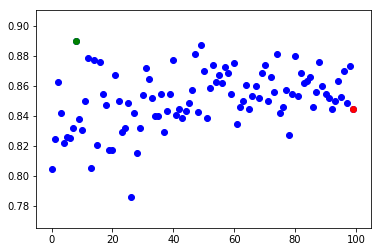

In [40]:
##h_sizes=[300]
##ld_durations=[50,50]
##l2_reg= 20
##lr = [1e-2, 3e-3]
smlp = sparseflow.SparseMLP(
         Y            = ic50coo,
         Ytest        = test,
         X            = ecfpcoo,
         h_sizes      = [300],
         optimizer    = "adam",
         lr           = [1e-2, 3e-3],
         lr_durations = [50, 50],
         batch_size   = 150,
         l2_reg       = 20,
         dropout      = 0.8,
         auc_min_pos  = 50,
         auc_min_neg  = 50,
)
smlp.run()

aucs20 = []
aucs20 += smlp.aucs_test

aucs20_indeces = []
list_aucs20_indeces = []
def indices( aucs20, value):
    return [i for i,x in enumerate(aucs20) if x==value]

for a in aucs20:
    aucs20_indeces += indices(aucs20, a)
    set_aucs20_indeces = set(aucs20_indeces)
for s in set_aucs20_indeces:
    list_aucs20_indeces += [s]

fig, ax = plt.subplots()
ax.scatter(list_aucs20_indeces, aucs20, color="blue")
ax.scatter(list_aucs20_indeces[-1], aucs20[-1], color="red")
ax.scatter(list_aucs20_indeces[aucs20.index(max(aucs20))], max(aucs20), color="green")
plt.show()

2019-07-29 14:58:39,344 - INFO - Computing mean AUC for 2 columns (with 50 positives and 50 negatives).
2019-07-29 14:58:39,581 - INFO - TensorFlow model setup completed!
2019-07-29 14:58:42,206 - INFO - 	logl_tr  logl_te |  auc_tr   auc_te
2019-07-29 14:58:42,207 - INFO - 0.	0.39459  0.50746 | 0.89416  0.83923 | 1.0e-02 [2.0 sec]
2019-07-29 14:58:44,172 - INFO - 1.	0.36024  0.49398 | 0.91732  0.79776 | 1.0e-02 [2.0 sec]
2019-07-29 14:58:46,123 - INFO - 2.	0.37907  0.49898 | 0.92128  0.80314 | 1.0e-02 [1.9 sec]
2019-07-29 14:58:48,084 - INFO - 3.	0.33698  0.48771 | 0.90445  0.85721 | 1.0e-02 [2.0 sec]
2019-07-29 14:58:50,047 - INFO - 4.	0.32425  0.48373 | 0.94573  0.89744 | 1.0e-02 [2.0 sec]
2019-07-29 14:58:52,015 - INFO - 5.	0.32118  0.47611 | 0.94912  0.85984 | 1.0e-02 [2.0 sec]
2019-07-29 14:58:53,979 - INFO - 6.	0.32123  0.48981 | 0.91947  0.81026 | 1.0e-02 [2.0 sec]
2019-07-29 14:58:55,934 - INFO - 7.	0.32096  0.47592 | 0.92809  0.83439 | 1.0e-02 [2.0 sec]
2019-07-29 14:58:57,900

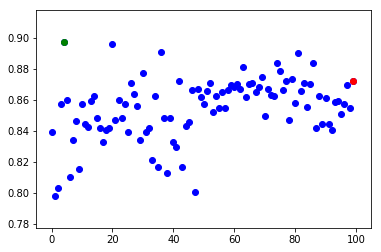

In [41]:
##h_sizes=[300]
##ld_durations=[50,50]
##l2_reg= 25
##lr = [1e-2, 3e-3]
smlp = sparseflow.SparseMLP(
         Y            = ic50coo,
         Ytest        = test,
         X            = ecfpcoo,
         h_sizes      = [300],
         optimizer    = "adam",
         lr           = [1e-2, 3e-3],
         lr_durations = [50, 50],
         batch_size   = 150,
         l2_reg       = 25,
         dropout      = 0.8,
         auc_min_pos  = 50,
         auc_min_neg  = 50,
)
smlp.run()

aucs21 = []
aucs21 += smlp.aucs_test

aucs21_indeces = []
list_aucs21_indeces = []
def indices( aucs21, value):
    return [i for i,x in enumerate(aucs21) if x==value]

for a in aucs21:
    aucs21_indeces += indices(aucs21, a)
    set_aucs21_indeces = set(aucs21_indeces)
for s in set_aucs21_indeces:
    list_aucs21_indeces += [s]

fig, ax = plt.subplots()
ax.scatter(list_aucs21_indeces, aucs21, color="blue")
ax.scatter(list_aucs21_indeces[-1], aucs21[-1], color="red")
ax.scatter(list_aucs21_indeces[aucs21.index(max(aucs21))], max(aucs21), color="green")
plt.show()

2019-07-29 15:03:02,228 - INFO - Computing mean AUC for 2 columns (with 50 positives and 50 negatives).
2019-07-29 15:03:02,476 - INFO - TensorFlow model setup completed!
2019-07-29 15:03:05,174 - INFO - 	logl_tr  logl_te |  auc_tr   auc_te
2019-07-29 15:03:05,175 - INFO - 0.	0.40387  0.51495 | 0.85431  0.76654 | 1.0e-02 [2.1 sec]
2019-07-29 15:03:07,148 - INFO - 1.	0.37534  0.50326 | 0.92134  0.81795 | 1.0e-02 [2.0 sec]
2019-07-29 15:03:09,106 - INFO - 2.	0.35230  0.48991 | 0.90070  0.82724 | 1.0e-02 [2.0 sec]
2019-07-29 15:03:11,078 - INFO - 3.	0.34069  0.49498 | 0.92434  0.84228 | 1.0e-02 [2.0 sec]
2019-07-29 15:03:13,035 - INFO - 4.	0.32577  0.47561 | 0.92107  0.84333 | 1.0e-02 [2.0 sec]
2019-07-29 15:03:14,986 - INFO - 5.	0.32435  0.47971 | 0.93121  0.86990 | 1.0e-02 [1.9 sec]
2019-07-29 15:03:16,952 - INFO - 6.	0.31412  0.47910 | 0.93274  0.81942 | 1.0e-02 [2.0 sec]
2019-07-29 15:03:18,961 - INFO - 7.	0.31423  0.48067 | 0.90593  0.81327 | 1.0e-02 [2.0 sec]
2019-07-29 15:03:20,919

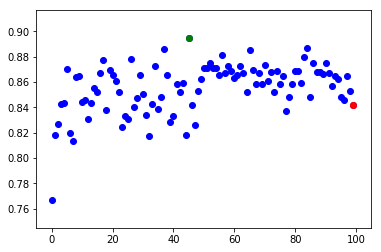

In [42]:
##h_sizes=[300]
##ld_durations=[50,50]
##l2_reg= 30
##lr = [1e-2, 3e-3]
smlp = sparseflow.SparseMLP(
         Y            = ic50coo,
         Ytest        = test,
         X            = ecfpcoo,
         h_sizes      = [300],
         optimizer    = "adam",
         lr           = [1e-2, 3e-3],
         lr_durations = [50, 50],
         batch_size   = 150,
         l2_reg       = 30,
         dropout      = 0.8,
         auc_min_pos  = 50,
         auc_min_neg  = 50,
)
smlp.run()

aucs22 = []
aucs22 += smlp.aucs_test

aucs22_indeces = []
list_aucs22_indeces = []
def indices( aucs22, value):
    return [i for i,x in enumerate(aucs22) if x==value]

for a in aucs22:
    aucs22_indeces += indices(aucs22, a)
    set_aucs22_indeces = set(aucs22_indeces)
for s in set_aucs22_indeces:
    list_aucs22_indeces += [s]

fig, ax = plt.subplots()
ax.scatter(list_aucs22_indeces, aucs22, color="blue")
ax.scatter(list_aucs22_indeces[-1], aucs22[-1], color="red")
ax.scatter(list_aucs22_indeces[aucs22.index(max(aucs22))], max(aucs22), color="green")
plt.show()

2019-07-29 15:10:22,089 - INFO - Computing mean AUC for 2 columns (with 50 positives and 50 negatives).
2019-07-29 15:10:22,333 - INFO - TensorFlow model setup completed!
2019-07-29 15:10:25,671 - INFO - 	logl_tr  logl_te |  auc_tr   auc_te
2019-07-29 15:10:25,672 - INFO - 0.	0.39396  0.51112 | 0.90280  0.80811 | 1.0e-02 [2.5 sec]
2019-07-29 15:10:28,177 - INFO - 1.	0.37127  0.49971 | 0.89467  0.76734 | 1.0e-02 [2.5 sec]
2019-07-29 15:10:30,690 - INFO - 2.	0.35927  0.48037 | 0.91136  0.85872 | 1.0e-02 [2.5 sec]
2019-07-29 15:10:33,242 - INFO - 3.	0.35013  0.49138 | 0.91187  0.84481 | 1.0e-02 [2.5 sec]
2019-07-29 15:10:35,687 - INFO - 4.	0.32681  0.47481 | 0.93584  0.83962 | 1.0e-02 [2.4 sec]
2019-07-29 15:10:38,138 - INFO - 5.	0.32567  0.48177 | 0.91532  0.84484 | 1.0e-02 [2.4 sec]
2019-07-29 15:10:40,589 - INFO - 6.	0.31911  0.48817 | 0.93320  0.82772 | 1.0e-02 [2.4 sec]
2019-07-29 15:10:43,080 - INFO - 7.	0.31176  0.48048 | 0.92186  0.83840 | 1.0e-02 [2.5 sec]
2019-07-29 15:10:45,568

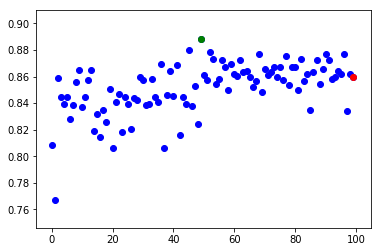

In [43]:
##h_sizes=[400]
##ld_durations=[50,50]
##l2_reg= 25
##lr = [1e-2, 3e-3]
smlp = sparseflow.SparseMLP(
         Y            = ic50coo,
         Ytest        = test,
         X            = ecfpcoo,
         h_sizes      = [400],
         optimizer    = "adam",
         lr           = [1e-2, 3e-3],
         lr_durations = [50, 50],
         batch_size   = 150,
         l2_reg       = 25,
         dropout      = 0.8,
         auc_min_pos  = 50,
         auc_min_neg  = 50,
)
smlp.run()

aucs23 = []
aucs23 += smlp.aucs_test

aucs23_indeces = []
list_aucs23_indeces = []
def indices( aucs23, value):
    return [i for i,x in enumerate(aucs23) if x==value]

for a in aucs23:
    aucs23_indeces += indices(aucs23, a)
    set_aucs23_indeces = set(aucs23_indeces)
for s in set_aucs23_indeces:
    list_aucs23_indeces += [s]

fig, ax = plt.subplots()
ax.scatter(list_aucs23_indeces, aucs23, color="blue")
ax.scatter(list_aucs23_indeces[-1], aucs23[-1], color="red")
ax.scatter(list_aucs23_indeces[aucs23.index(max(aucs23))], max(aucs23), color="green")
plt.show()

2019-07-29 15:15:50,725 - INFO - Computing mean AUC for 2 columns (with 50 positives and 50 negatives).
2019-07-29 15:15:50,954 - INFO - TensorFlow model setup completed!
2019-07-29 15:15:54,289 - INFO - 	logl_tr  logl_te |  auc_tr   auc_te
2019-07-29 15:15:54,290 - INFO - 0.	0.38785  0.51533 | 0.89204  0.77897 | 1.0e-02 [2.6 sec]
2019-07-29 15:15:56,773 - INFO - 1.	0.36669  0.49567 | 0.86589  0.77173 | 1.0e-02 [2.5 sec]
2019-07-29 15:15:59,208 - INFO - 2.	0.36453  0.49445 | 0.92716  0.83567 | 1.0e-02 [2.4 sec]
2019-07-29 15:16:01,643 - INFO - 3.	0.34857  0.48501 | 0.93801  0.82702 | 1.0e-02 [2.4 sec]
2019-07-29 15:16:04,152 - INFO - 4.	0.32732  0.47336 | 0.91572  0.85119 | 1.0e-02 [2.5 sec]
2019-07-29 15:16:06,794 - INFO - 5.	0.32304  0.48267 | 0.93069  0.83801 | 1.0e-02 [2.6 sec]
2019-07-29 15:16:09,284 - INFO - 6.	0.31507  0.48369 | 0.92928  0.81958 | 1.0e-02 [2.5 sec]
2019-07-29 15:16:11,717 - INFO - 7.	0.31596  0.48194 | 0.93091  0.82269 | 1.0e-02 [2.4 sec]
2019-07-29 15:16:14,153

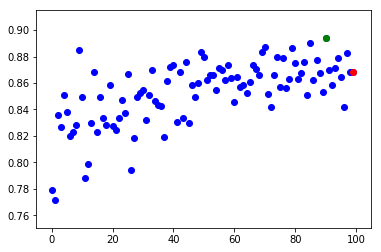

In [44]:
##h_sizes=[400]
##ld_durations=[50,50]
##l2_reg= 20
##lr = [1e-2, 3e-3]
smlp = sparseflow.SparseMLP(
         Y            = ic50coo,
         Ytest        = test,
         X            = ecfpcoo,
         h_sizes      = [400],
         optimizer    = "adam",
         lr           = [1e-2, 3e-3],
         lr_durations = [50, 50],
         batch_size   = 150,
         l2_reg       = 20,
         dropout      = 0.8,
         auc_min_pos  = 50,
         auc_min_neg  = 50,
)
smlp.run()

aucs24 = []
aucs24 += smlp.aucs_test

aucs24_indeces = []
list_aucs24_indeces = []
def indices( aucs24, value):
    return [i for i,x in enumerate(aucs24) if x==value]

for a in aucs24:
    aucs24_indeces += indices(aucs24, a)
    set_aucs24_indeces = set(aucs24_indeces)
for s in set_aucs24_indeces:
    list_aucs24_indeces += [s]

fig, ax = plt.subplots()
ax.scatter(list_aucs24_indeces, aucs24, color="blue")
ax.scatter(list_aucs24_indeces[-1], aucs24[-1], color="red")
ax.scatter(list_aucs24_indeces[aucs24.index(max(aucs24))], max(aucs24), color="green")
plt.show()

2019-07-29 15:23:42,171 - INFO - Computing mean AUC for 2 columns (with 50 positives and 50 negatives).
2019-07-29 15:23:42,413 - INFO - TensorFlow model setup completed!
2019-07-29 15:23:45,211 - INFO - 	logl_tr  logl_te |  auc_tr   auc_te
2019-07-29 15:23:45,212 - INFO - 0.	0.38101  0.49952 | 0.95303  0.85061 | 5.0e-03 [2.2 sec]
2019-07-29 15:23:47,177 - INFO - 1.	0.35403  0.49048 | 0.96837  0.84426 | 5.0e-03 [2.0 sec]
2019-07-29 15:23:49,134 - INFO - 2.	0.34413  0.49539 | 0.94436  0.86381 | 5.0e-03 [2.0 sec]
2019-07-29 15:23:51,101 - INFO - 3.	0.32405  0.48323 | 0.94188  0.82663 | 5.0e-03 [2.0 sec]
2019-07-29 15:23:53,061 - INFO - 4.	0.32151  0.47655 | 0.92346  0.85340 | 5.0e-03 [2.0 sec]
2019-07-29 15:23:55,006 - INFO - 5.	0.31283  0.48668 | 0.94421  0.82689 | 5.0e-03 [1.9 sec]
2019-07-29 15:23:56,953 - INFO - 6.	0.29892  0.47134 | 0.97220  0.89753 | 5.0e-03 [1.9 sec]
2019-07-29 15:23:58,904 - INFO - 7.	0.30340  0.47871 | 0.94955  0.84064 | 5.0e-03 [1.9 sec]
2019-07-29 15:24:00,854

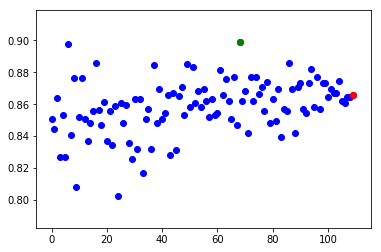

In [45]:
##h_sizes=[300]
##ld_durations=[50, 50, 10]
##l2_reg= 25
##lr = [5e-3, 3e-3, 1e-3]
smlp = sparseflow.SparseMLP(
         Y            = ic50coo,
         Ytest        = test,
         X            = ecfpcoo,
         h_sizes      = [300],
         optimizer    = "adam",
         lr           = [5e-3, 3e-3, 1e-3],
         lr_durations = [50, 50, 10],
         batch_size   = 150,
         l2_reg       = 25,
         dropout      = 0.8,
         auc_min_pos  = 50,
         auc_min_neg  = 50,
)
smlp.run()

aucs25 = []
aucs25 += smlp.aucs_test

aucs25_indeces = []
list_aucs25_indeces = []
def indices( aucs25, value):
    return [i for i,x in enumerate(aucs25) if x==value]

for a in aucs25:
    aucs25_indeces += indices(aucs25, a)
    set_aucs25_indeces = set(aucs25_indeces)
for s in set_aucs25_indeces:
    list_aucs25_indeces += [s]

fig, ax = plt.subplots()
ax.scatter(list_aucs25_indeces, aucs25, color="blue")
ax.scatter(list_aucs25_indeces[-1], aucs25[-1], color="red")
ax.scatter(list_aucs25_indeces[aucs25.index(max(aucs25))], max(aucs25), color="green")
plt.show()

2019-07-29 15:34:08,431 - INFO - Computing mean AUC for 2 columns (with 50 positives and 50 negatives).
2019-07-29 15:34:08,649 - INFO - TensorFlow model setup completed!
2019-07-29 15:34:11,479 - INFO - 	logl_tr  logl_te |  auc_tr   auc_te
2019-07-29 15:34:11,480 - INFO - 0.	0.37446  0.50772 | 0.94914  0.83282 | 5.0e-03 [2.1 sec]
2019-07-29 15:34:13,446 - INFO - 1.	0.34585  0.49005 | 0.94287  0.82946 | 5.0e-03 [2.0 sec]
2019-07-29 15:34:15,396 - INFO - 2.	0.33407  0.48695 | 0.95664  0.82394 | 5.0e-03 [1.9 sec]
2019-07-29 15:34:17,356 - INFO - 3.	0.31999  0.49315 | 0.95547  0.83349 | 5.0e-03 [2.0 sec]
2019-07-29 15:34:19,302 - INFO - 4.	0.31497  0.47537 | 0.96233  0.85853 | 5.0e-03 [1.9 sec]
2019-07-29 15:34:21,257 - INFO - 5.	0.30433  0.48076 | 0.95731  0.81051 | 5.0e-03 [2.0 sec]
2019-07-29 15:34:23,200 - INFO - 6.	0.29593  0.47208 | 0.93879  0.86987 | 5.0e-03 [1.9 sec]
2019-07-29 15:34:25,166 - INFO - 7.	0.29599  0.48257 | 0.94196  0.84564 | 5.0e-03 [2.0 sec]
2019-07-29 15:34:27,119

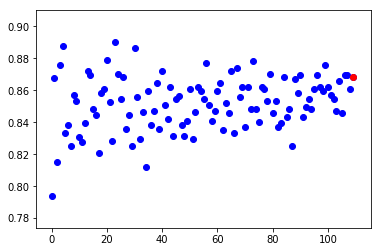

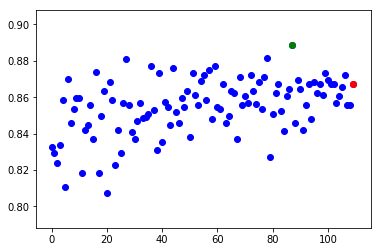

In [47]:
#dropout=0.6
smlp = sparseflow.SparseMLP(
         Y            = ic50coo,
         Ytest        = test,
         X            = ecfpcoo,
         h_sizes      = [300],
         optimizer    = "adam",
         lr           = [5e-3, 3e-3, 1e-3],
         lr_durations = [50, 50, 10],
         batch_size   = 150,
         l2_reg       = 25,
         dropout      = 0.6,
         auc_min_pos  = 50,
         auc_min_neg  = 50,
)
smlp.run()

aucs26 = []
aucs26 += smlp.aucs_test

aucs26_indeces = []
list_aucs26_indeces = []
def indices( aucs26, value):
    return [i for i,x in enumerate(aucs26) if x==value]

for a in aucs26:
    aucs26_indeces += indices(aucs26, a)
    set_aucs26_indeces = set(aucs26_indeces)
for s in set_aucs26_indeces:
    list_aucs26_indeces += [s]

fig, ax = plt.subplots()
ax.scatter(list_aucs26_indeces, aucs26, color="blue")
ax.scatter(list_aucs26_indeces[-1], aucs26[-1], color="red")
ax.scatter(list_aucs26_indeces[aucs26.index(max(aucs26))], max(aucs26), color="green")
plt.show()

2019-07-29 15:41:52,100 - INFO - Computing mean AUC for 2 columns (with 50 positives and 50 negatives).
2019-07-29 15:41:52,334 - INFO - TensorFlow model setup completed!
2019-07-29 15:41:55,043 - INFO - 	logl_tr  logl_te |  auc_tr   auc_te
2019-07-29 15:41:55,044 - INFO - 0.	0.38351  0.50191 | 0.94565  0.81542 | 5.0e-03 [2.1 sec]
2019-07-29 15:41:57,252 - INFO - 1.	0.34771  0.49160 | 0.94844  0.84561 | 5.0e-03 [2.2 sec]
2019-07-29 15:41:59,313 - INFO - 2.	0.33351  0.48694 | 0.96256  0.85353 | 5.0e-03 [2.1 sec]
2019-07-29 15:42:01,371 - INFO - 3.	0.32676  0.48006 | 0.93141  0.84968 | 5.0e-03 [2.1 sec]
2019-07-29 15:42:03,469 - INFO - 4.	0.31063  0.48812 | 0.94114  0.81920 | 5.0e-03 [2.1 sec]
2019-07-29 15:42:05,415 - INFO - 5.	0.30563  0.47264 | 0.95415  0.81686 | 5.0e-03 [1.9 sec]
2019-07-29 15:42:07,364 - INFO - 6.	0.30434  0.48567 | 0.94273  0.87628 | 5.0e-03 [1.9 sec]
2019-07-29 15:42:09,322 - INFO - 7.	0.29251  0.47931 | 0.95075  0.83843 | 5.0e-03 [2.0 sec]
2019-07-29 15:42:11,283

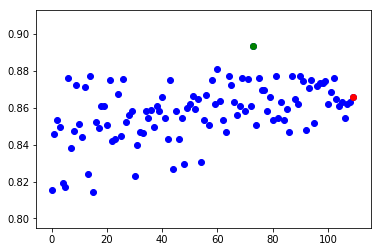

In [48]:
#dropout=0.7
smlp = sparseflow.SparseMLP(
         Y            = ic50coo,
         Ytest        = test,
         X            = ecfpcoo,
         h_sizes      = [300],
         optimizer    = "adam",
         lr           = [5e-3, 3e-3, 1e-3],
         lr_durations = [50, 50, 10],
         batch_size   = 150,
         l2_reg       = 25,
         dropout      = 0.7,
         auc_min_pos  = 50,
         auc_min_neg  = 50,
)
smlp.run()

aucs27 = []
aucs27 += smlp.aucs_test

aucs27_indeces = []
list_aucs27_indeces = []
def indices( aucs27, value):
    return [i for i,x in enumerate(aucs27) if x==value]

for a in aucs27:
    aucs27_indeces += indices(aucs27, a)
    set_aucs27_indeces = set(aucs27_indeces)
for s in set_aucs27_indeces:
    list_aucs27_indeces += [s]

fig, ax = plt.subplots()
ax.scatter(list_aucs27_indeces, aucs27, color="blue")
ax.scatter(list_aucs27_indeces[-1], aucs27[-1], color="red")
ax.scatter(list_aucs27_indeces[aucs27.index(max(aucs27))], max(aucs27), color="green")
plt.show()

2019-07-29 15:53:44,305 - INFO - Computing mean AUC for 2 columns (with 50 positives and 50 negatives).
2019-07-29 15:53:44,525 - INFO - TensorFlow model setup completed!
2019-07-29 15:53:48,426 - INFO - 	logl_tr  logl_te |  auc_tr   auc_te
2019-07-29 15:53:48,427 - INFO - 0.	0.38818  0.50663 | 0.93991  0.81929 | 5.0e-03 [3.0 sec]
2019-07-29 15:53:50,382 - INFO - 1.	0.35126  0.49212 | 0.92314  0.81824 | 5.0e-03 [1.9 sec]
2019-07-29 15:53:52,327 - INFO - 2.	0.34374  0.48706 | 0.95374  0.84728 | 5.0e-03 [1.9 sec]
2019-07-29 15:53:54,299 - INFO - 3.	0.33442  0.47795 | 0.93719  0.85452 | 5.0e-03 [2.0 sec]
2019-07-29 15:53:56,251 - INFO - 4.	0.31872  0.48385 | 0.92204  0.83442 | 5.0e-03 [1.9 sec]
2019-07-29 15:53:58,198 - INFO - 5.	0.31064  0.47694 | 0.94216  0.87394 | 5.0e-03 [1.9 sec]
2019-07-29 15:54:00,154 - INFO - 6.	0.30995  0.47891 | 0.94366  0.85058 | 5.0e-03 [2.0 sec]
2019-07-29 15:54:02,104 - INFO - 7.	0.30393  0.48332 | 0.92292  0.81487 | 5.0e-03 [1.9 sec]
2019-07-29 15:54:04,053

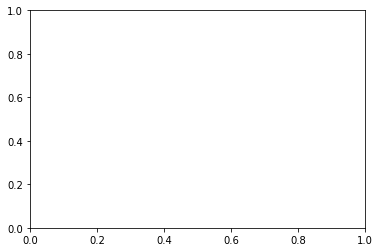

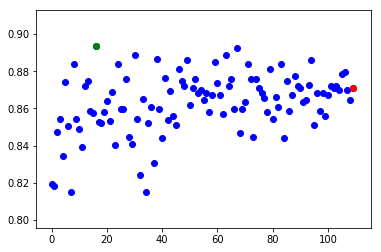

In [50]:
#dropout=0.8
smlp = sparseflow.SparseMLP(
         Y            = ic50coo,
         Ytest        = test,
         X            = ecfpcoo,
         h_sizes      = [300],
         optimizer    = "adam",
         lr           = [5e-3, 3e-3, 1e-3],
         lr_durations = [50, 50, 10],
         batch_size   = 150,
         l2_reg       = 25,
         dropout      = 0.8,
         auc_min_pos  = 50,
         auc_min_neg  = 50,
)
smlp.run()

aucs28 = []
aucs28 += smlp.aucs_test

aucs28_indeces = []
list_aucs28_indeces = []
def indices( aucs28, value):
    return [i for i,x in enumerate(aucs28) if x==value]

for a in aucs28:
    aucs28_indeces += indices(aucs28, a)
    set_aucs28_indeces = set(aucs28_indeces)
for s in set_aucs28_indeces:
    list_aucs28_indeces += [s]

fig, ax = plt.subplots()
ax.scatter(list_aucs28_indeces, aucs28, color="blue")
ax.scatter(list_aucs28_indeces[-1], aucs28[-1], color="red")
ax.scatter(list_aucs28_indeces[aucs28.index(max(aucs28))], max(aucs28), color="green")
plt.show()

2019-07-29 16:00:36,061 - INFO - Computing mean AUC for 2 columns (with 50 positives and 50 negatives).
2019-07-29 16:00:36,308 - INFO - TensorFlow model setup completed!
2019-07-29 16:00:39,089 - INFO - 	logl_tr  logl_te |  auc_tr   auc_te
2019-07-29 16:00:39,090 - INFO - 0.	0.39564  0.51093 | 0.94179  0.85939 | 5.0e-03 [2.2 sec]
2019-07-29 16:00:41,092 - INFO - 1.	0.36475  0.49548 | 0.95607  0.82676 | 5.0e-03 [2.0 sec]
2019-07-29 16:00:43,046 - INFO - 2.	0.34306  0.49198 | 0.94087  0.79022 | 5.0e-03 [2.0 sec]
2019-07-29 16:00:45,094 - INFO - 3.	0.33467  0.48407 | 0.93319  0.82218 | 5.0e-03 [2.0 sec]
2019-07-29 16:00:47,242 - INFO - 4.	0.31690  0.48564 | 0.92503  0.85112 | 5.0e-03 [2.1 sec]
2019-07-29 16:00:49,178 - INFO - 5.	0.31984  0.47686 | 0.95413  0.86856 | 5.0e-03 [1.9 sec]
2019-07-29 16:00:51,112 - INFO - 6.	0.31521  0.48349 | 0.95440  0.84442 | 5.0e-03 [1.9 sec]
2019-07-29 16:00:53,057 - INFO - 7.	0.30647  0.48068 | 0.92567  0.83593 | 5.0e-03 [1.9 sec]
2019-07-29 16:00:54,995

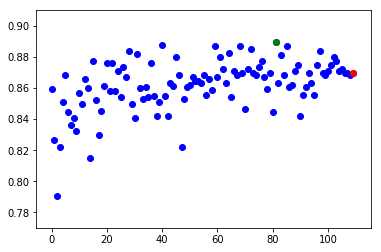

In [51]:
#dropout=0.9
smlp = sparseflow.SparseMLP(
         Y            = ic50coo,
         Ytest        = test,
         X            = ecfpcoo,
         h_sizes      = [300],
         optimizer    = "adam",
         lr           = [5e-3, 3e-3, 1e-3],
         lr_durations = [50, 50, 10],
         batch_size   = 150,
         l2_reg       = 25,
         dropout      = 0.9,
         auc_min_pos  = 50,
         auc_min_neg  = 50,
)
smlp.run()

aucs29 = []
aucs29 += smlp.aucs_test

aucs29 = []
aucs29 += smlp.aucs_test

aucs29_indeces = []
list_aucs29_indeces = []
def indices( aucs29, value):
    return [i for i,x in enumerate(aucs29) if x==value]

for a in aucs29:
    aucs29_indeces += indices(aucs29, a)
    set_aucs29_indeces = set(aucs29_indeces)
for s in set_aucs29_indeces:
    list_aucs29_indeces += [s]

fig, ax = plt.subplots()
ax.scatter(list_aucs29_indeces, aucs29, color="blue")
ax.scatter(list_aucs29_indeces[-1], aucs29[-1], color="red")
ax.scatter(list_aucs29_indeces[aucs29.index(max(aucs29))], max(aucs29), color="green")
plt.show()